# Neural Network with simple calculus and Numpy package

In [1]:
# import the packages; pandas for data loading, numpy for matrix operations and matplotlib for graph plotting.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# We load the data and view a few samples.
data = pd.read_csv(r"C:\Users\ifunanyaScript\Everything\NN_maths_and_numpy/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = data.to_numpy() # We convert the dataframe into a numpy array.
samples, features = data.shape # We get the dimensions of said dataframe.
np.random.shuffle(data) # We shuffle the data set to achieve some randomness.

It's important to notice that we have to transpose the data(array)<br>
such that each row now becomes a column, so each sample of our data<br>
is in a separate column

In [4]:
# We split the data into training and testing chunks and then, transpose the data.
train_data = data[1000:samples].T
test_data = data[0:1000].T

# We define the features and target labels, and then normalise the features.
X_train = train_data[1:features]
X_train = X_train/255.
Y_train = train_data[0]

X_test = test_data[1:features]
X_test = X_test/255.
Y_test = test_data[0]

We'll define a bunch of functions that will be used to work out this neural network.<br>
There'll be a function to initialize the weights and biases, a function to perform the forward<br>
propagation, a function to perform the backward propagation, a function for activation(I picked Leaky_ReLU),<br>
a function to one hot encode the target labels, a function for softmax activation, a function to perform the<br>
gradient descent, and some other extra functions to seal it up😃.

In [ ]:
# This function generates random weights and biases that the network begins with.
def initial_parameters():
    first_weights = np.random.rand(10, 784) - .5
    first_bias = np.random.rand(10, 1) - .5
    second_weights = np.random.rand(10, 10) - .5
    second_bias = np.random.rand(10, 1) - .5
    return first_weights, first_bias, second_weights, second_bias

In [ ]:
# The leaky relu; Leaky Rectified Linear Unit, is like the relu, but it solves the case of
# disappearing gradients, as it gives some thought to neurons with negative outputs.
def Leaky_ReLU(step_1, alpha):
    for sub_array in step_1:
        for i, value in enumerate(sub_array):
            if value>0:
                sub_array[i] = value
            else:
                sub_array[i] = (alpha*value)
    return step_1

# This function calculates the derivative of the above Leaky_ReLU function.
def LR_deriv(step_1, alpha):
    for sub_array in step_1:
        for i, value in enumerate(sub_array):
            if value>0:
                sub_array[i] = 1
            else:
                sub_array[i] = alpha
    return step_1

In [ ]:
"""
def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0
"""

In [ ]:
# This function is used in the output/last layer of the network to generate a probability
# array of the target labels.
def Softmax(step_3):
    prob_array = np.exp(step_3) / sum(np.exp(step_3))
    return prob_array

In [ ]:
# This function encodes our labels into a binary form of ones and zeros.
def One_Hot_Encoder(Y_train):
    binary_labels = np.zeros((Y_train.size, Y_train.max() + 1))
    binary_labels[np.arange(Y_train.size), Y_train] = 1
    binary_labels = binary_labels.T
    return binary_labels

In [ ]:
# This function performs series of matrix operations called
# forward propagation in the neural network.
def forward_pass(first_weights, first_bias, second_weights, second_bias, X_train):
    step_1 = first_weights.dot(X_train) + first_bias
    step_2 = Leaky_ReLU(step_1, 0.01)
    step_3 = second_weights.dot(step_2) + second_bias
    step_4 = Softmax(step_3)
    return step_1, step_2, step_3, step_4

In [ ]:
# This function carries the backward propagation which involves, calculating the 
#derivatives of all the steps that yield to the final prediction of the neural network.
def backward_pass(step_1, step_2, step_3, step_4, first_weights, second_weights,
                  X_train, Y_train):
    binary_labels = One_Hot_Encoder(Y_train)
    d_step_3 = (step_4 - binary_labels)
    d_second_weights = 1/samples * d_step_3.dot(step_2.T)
    d_second_bias = 1/samples * np.sum(d_step_3)
    d_step_2 = second_weights.T.dot(d_step_3) * LR_deriv(step_1, 0.01)
    d_first_weights = 1/samples * d_step_2.dot(X_train.T)
    d_first_bias = 1/samples * np.sum(d_step_2)
    return d_first_weights, d_first_bias, d_second_weights, d_second_bias

In [ ]:
# This function is used to update the weights and biases.
def update_parameters(first_weights, first_bias, second_weights, second_bias,
                      d_first_weights, d_first_bias, d_second_weights, d_second_bias, 
                      learning_rate):
    first_weights = first_weights - d_first_weights*learning_rate
    first_bias = first_bias - d_first_bias*learning_rate
    second_weights = second_weights - d_second_weights*learning_rate
    second_bias = second_bias - d_second_bias*learning_rate
    return first_weights, first_bias, second_weights, second_bias

In [5]:
# The below functions are used to get final predictions and calculate accuracy.
def predictions(step_4):
    return np.argmax(step_4, 0)

def accuracy(predictions, Y_train):
    # print(predictions, Y_train)
    return np.sum(predictions == Y_train)/Y_train.shape[0]

In [8]:
# This function is used to perform gradient descent, i.e, it utilizes all the pre-defined
# functions to train the neural network, and get the optimized weights and biases.
def gradient_descent(X_train, Y_train, learning_rate, epochs):
    first_weights, first_bias, second_weights, second_bias = initial_parameters()
    for epoch in range(epochs):
        step_1, step_2, step_3, step_4 = forward_pass(first_weights, first_bias,
                                                      second_weights, second_bias, X_train)
        
        d_first_weights, d_first_bias, d_second_weights, d_second_bias = backward_pass(
                                                                        step_1, step_2, 
                                                                        step_3, step_4,
                                                                        first_weights,
                                                                        second_weights, 
                                                                        X_train, Y_train)
        
        first_weights, first_bias, second_weights, second_bias = update_parameters(
                                                            first_weights, first_bias, 
                                                            second_weights, second_bias,
                                                            d_first_weights, d_first_bias, 
                                                            d_second_weights, d_second_bias, 
                                                            learning_rate)

        if epoch % 200 == 0:
            print(f"Epochs: {epoch}/{epochs}")
            pred = predictions(step_4)
            print(f"{(accuracy(pred, Y_train)*100):.2f}%\n______________")
    return first_weights, first_bias, second_weights, second_bias

In [9]:
# We define learning rate and epochs/number of iterations.
learning_rate = 0.01
epochs = 10000

# This will perform a training loop and return the optimized weights and biases.
first_weights, first_bias, second_weights, second_bias = gradient_descent(X_train, Y_train, learning_rate, epochs)

Epochs: 0/10000
12.39%
______________
Epochs: 200/10000
20.21%
______________
Epochs: 400/10000
31.46%
______________
Epochs: 600/10000
40.96%
______________
Epochs: 800/10000
48.43%
______________
Epochs: 1000/10000
55.94%
______________
Epochs: 1200/10000
61.91%
______________
Epochs: 1400/10000
66.13%
______________
Epochs: 1600/10000
69.39%
______________
Epochs: 1800/10000
71.96%
______________
Epochs: 2000/10000
73.95%
______________
Epochs: 2200/10000
75.61%
______________
Epochs: 2400/10000
77.12%
______________
Epochs: 2600/10000
78.36%
______________
Epochs: 2800/10000
79.33%
______________
Epochs: 3000/10000
80.23%
______________
Epochs: 3200/10000
81.04%
______________
Epochs: 3400/10000
81.69%
______________
Epochs: 3600/10000
82.23%
______________
Epochs: 3800/10000
82.60%
______________
Epochs: 4000/10000
83.01%
______________
Epochs: 4200/10000
83.43%
______________
Epochs: 4400/10000
83.81%
______________
Epochs: 4600/10000
84.11%
______________
Epochs: 4800/10000
84.4

Wow! Without any deep learning framework, we managed to train a neural network with over 88% accuracy.<br>
<br>
After training the neural network, we can now used the optimized weights and biases<br>
to actually predict samples and see how well the trained neural network performs.

In [50]:
# I used this function to get the model prediction, returned in the "pred" variable.
def test(X, first_weights, first_bias, second_weights, second_bias):
    _, _, _, step_4 = forward_pass(first_weights, first_bias, second_weights, second_bias, X)
    pred = predictions(step_4)
    return pred

# Then I used this function to compare the NN prediction and the actual label.
def test_validation(index, first_weights, first_bias, second_weights, second_bias):
    the_sample = X_train[:, index, None]
    pred = test(X_train[:, index, None], first_weights, first_bias, second_weights, second_bias)
    label = Y_train[index]
    print(f"Model's prediction: {pred}\n Actual label: {label}")
    
    the_sample = the_sample.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(the_sample, interpolation="nearest")
    plt.show()

Model's prediction: [7]
 Actual label: 7


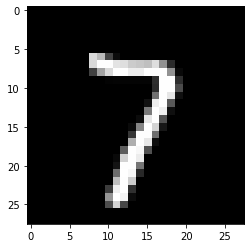

Model's prediction: [0]
 Actual label: 0


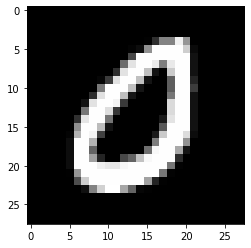

Model's prediction: [3]
 Actual label: 3


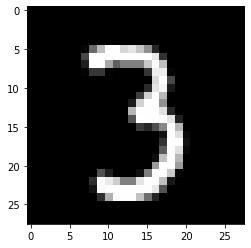

Model's prediction: [5]
 Actual label: 6


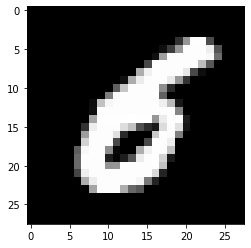

Model's prediction: [7]
 Actual label: 7


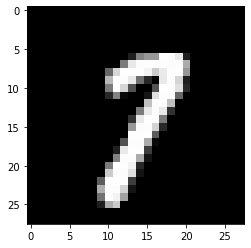

Model's prediction: [6]
 Actual label: 6


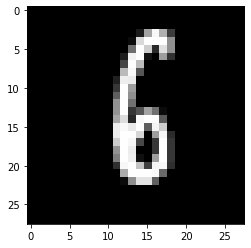

In [51]:
test_validation(5, first_weights, first_bias, second_weights, second_bias)
test_validation(34, first_weights, first_bias, second_weights, second_bias)
test_validation(56, first_weights, first_bias, second_weights, second_bias)
test_validation(89, first_weights, first_bias, second_weights, second_bias)
test_validation(101, first_weights, first_bias, second_weights, second_bias)
test_validation(234, first_weights, first_bias, second_weights, second_bias)

Let's finally see the performance of this neural network on the testing chunk we set out prior.

In [52]:
Validation = test(X_test, first_weights, first_bias, second_weights, second_bias)
print(f"Accuracy on testing data: {accuracy(Validation, Y_test) * 100}%")

Accuracy on testing data: 84.2%


# Separate testing without labels.
I downloaded this dataset from kaggle, so there's an entire dataset, set out for testing.<br>
This dataset isn't labelled, it only has pixel values and it's left for the NN to figure <br>
out which number each sample is. <br>
__We will validate if the NN is doing well by plotting each sample it predicts__, _we have eyes_.

In [59]:
another_data = pd.read_csv(r"C:\Users\ifunanyaScript\Everything\NN_maths_and_numpy\test.csv")
another_data.head() 

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Clearly there's no label for the samples. We are going in blindly.

In [60]:
# We load the data into a numpy array and transpose it.
another_data = another_data.to_numpy()
another_array = another_data.T
another_data.shape, another_array.shape

((28000, 784), (784, 28000))

In [62]:
# Let's see a sample.
another_array[:,0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  10,  17,  17,  17,  17,  81, 180, 180,
        35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 139, 253, 253, 253, 253, 253,
       253, 253,  48,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  60, 228, 253, 25

In [63]:
# This function predicts the number using the trained or optimised parameters(weights and biases).
def predict_number(index, first_weights, first_bias, second_weights, second_bias):
    the_sample = test_array[:, index, None]
    pred = test(test_array[:, index, None], first_weights, first_bias, second_weights, second_bias)
    print(f"Model's prediction: {pred}")
    
    the_sample = the_sample.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(the_sample, interpolation="nearest")
    plt.show()

Model's prediction: [5]


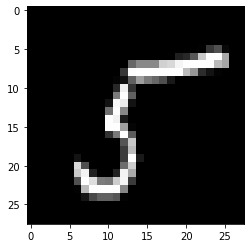

Model's prediction: [6]


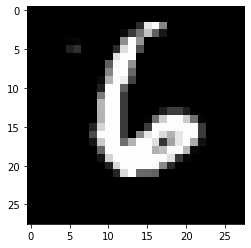

Model's prediction: [3]


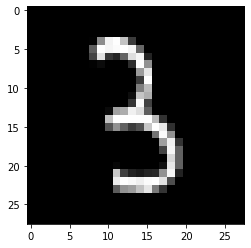

Model's prediction: [5]


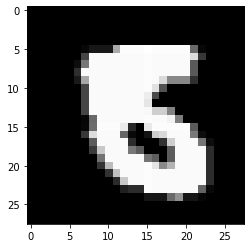

Model's prediction: [0]


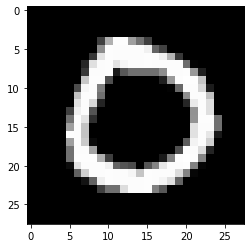

Model's prediction: [6]


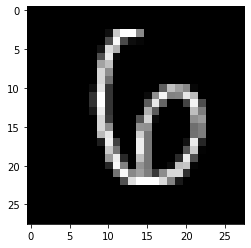

Model's prediction: [0]


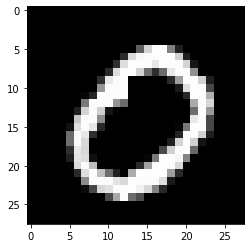

Model's prediction: [0]


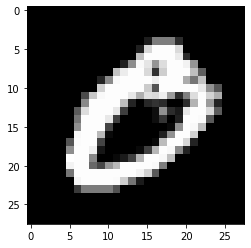

Model's prediction: [2]


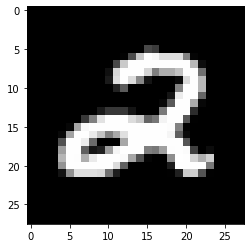

Model's prediction: [1]


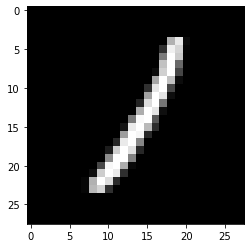

Model's prediction: [3]


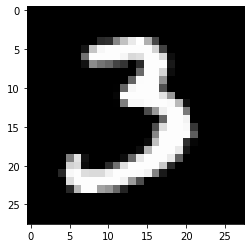

Model's prediction: [6]


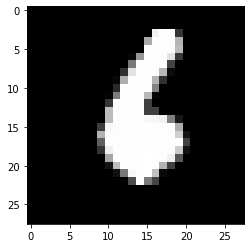

In [68]:
predict_number(23, first_weights, first_bias, second_weights, second_bias)
predict_number(300, first_weights, first_bias, second_weights, second_bias)
predict_number(15001, first_weights, first_bias, second_weights, second_bias)
predict_number(789, first_weights, first_bias, second_weights, second_bias)
predict_number(23456, first_weights, first_bias, second_weights, second_bias)
predict_number(3400, first_weights, first_bias, second_weights, second_bias)
predict_number(4309, first_weights, first_bias, second_weights, second_bias)
predict_number(23787, first_weights, first_bias, second_weights, second_bias)
predict_number(27999, first_weights, first_bias, second_weights, second_bias)
predict_number(19040, first_weights, first_bias, second_weights, second_bias)
predict_number(7802, first_weights, first_bias, second_weights, second_bias)
predict_number(9019, first_weights, first_bias, second_weights, second_bias)

Voilà!!! From our eyes we can see our NN is very good.<br>
It predicted all the samples we gave it, except the forth sample.<br>
Personally, I am unsure about the forth one myself, so.<br>
<br>
I hope this notebook has enlightened you on a basic level of how neural networks function<br>
under the hood. It's all a bunch of maths and more maths, but it's powerful and now you know too 😏😃.

In [ ]:
# ifunanyaScript